In [1]:
%run Functions.ipynb
import statsmodels.formula.api as smf 
plt.style.use(["seaborn-dark-palette", "seaborn-whitegrid"])
#pd.set_option('display.max_rows', 10000)

In [82]:
def funding_premium(df, date_start="2010-09-08", column="premium_btf"): 
    df = df[df.index>date_start]
    my_premium = pd.DataFrame(df[column][df["fundingRate"]!=0]).dropna()
    df = pd.merge(my_premium, df.fundingRate ,right_index = True, left_index=True,how="left")

    reg = smf.ols(formula='fundingRate ~ %s'%column, data=df)
    res = reg.fit()
    print(res.summary())
    
    plt.figure(figsize=(10,10))
    intercept = res.params[0]; slope = res.params[1]
    plt.plot(df[column].iloc[1:], df.fundingRate.iloc[1:], "o", alpha=0.3)
    plt.plot(df[column].iloc[1:], df[column].iloc[1:]*slope + intercept )
    plt.xlabel("premium"); plt.ylabel("fundingRate")
    plt.axhline(0, linewidth=0.5, color="black"); plt.axvline(0, linewidth=0.5, color="black");
    plt.show()
    
    plt.figure(figsize=(10,10))
    plt.plot(df.iloc[1:],alpha=0.5)
    plt.show()
    
    return df

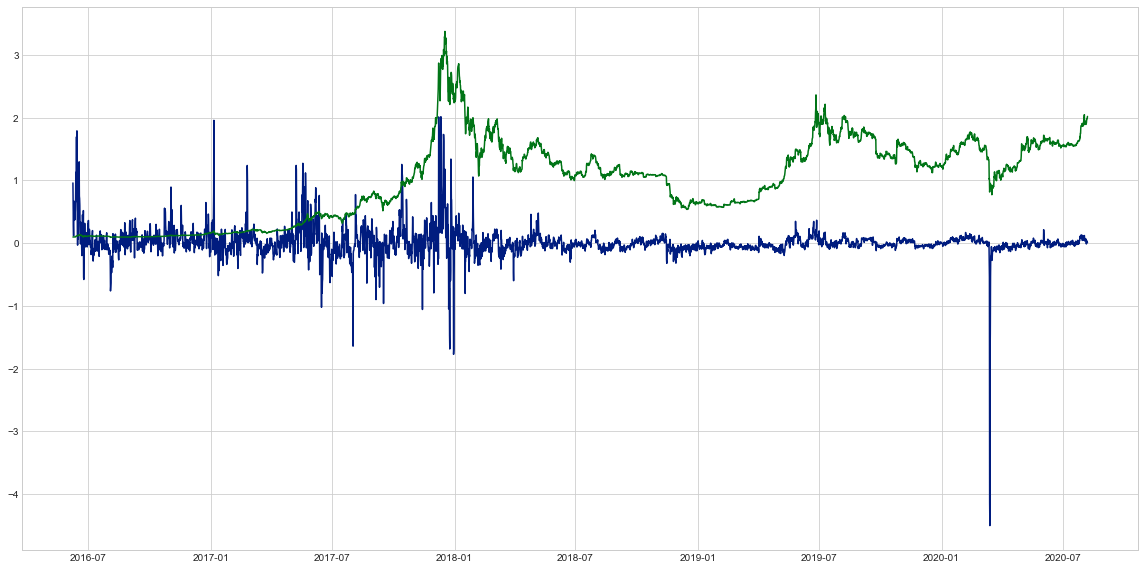

In [101]:
#Bitfinex premium
df_btf = df_xbt_bitmex[df_xbt_bitmex["XBTUSDPI8H"].isna()==False]
plt.figure(figsize=(20,10))
plt.plot(df_btf["XBTUSDPI8H"]*100)
plt.plot(df_btf["close"]/df_btf["close"].mean())

                            OLS Regression Results                            
Dep. Variable:            fundingRate   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     5047.
Date:                Wed, 09 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:20:51   Log-Likelihood:                 43494.
No. Observations:                7793   AIC:                        -8.698e+04
Df Residuals:                    7791   BIC:                        -8.697e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0001   1.03e-05     10.431      0.0

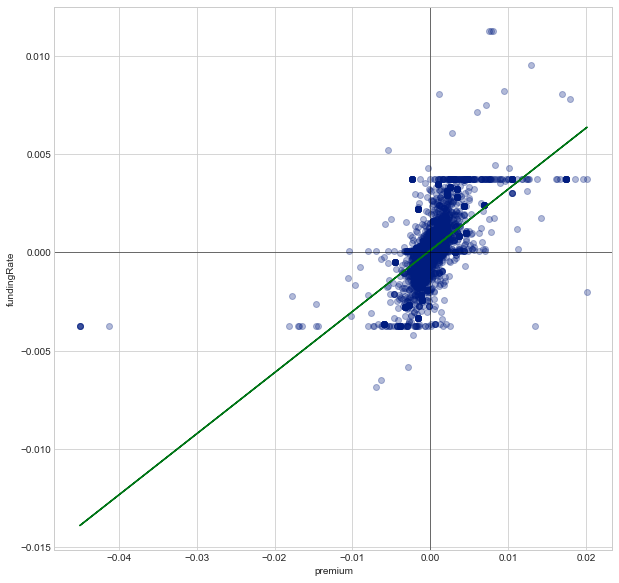

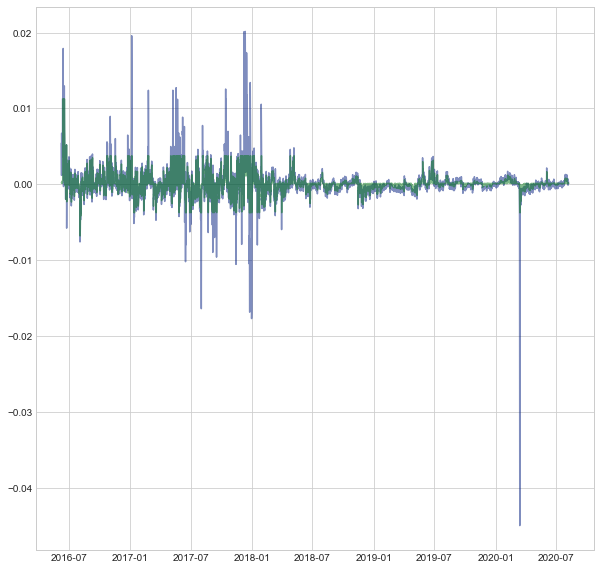

In [83]:
a = funding_premium(df_xbt_bitmex, date_start="2015-05-01", column="XBTUSDPI8H") #standar

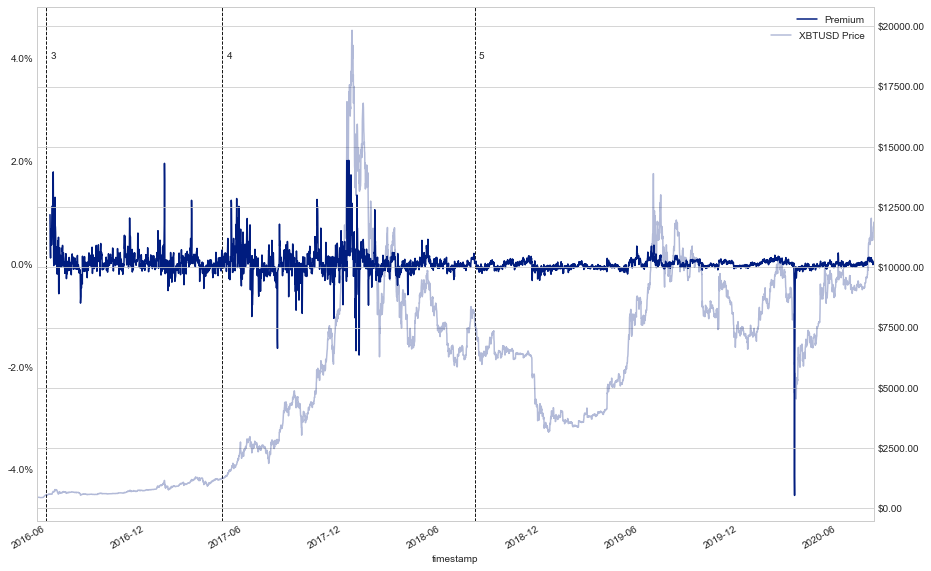

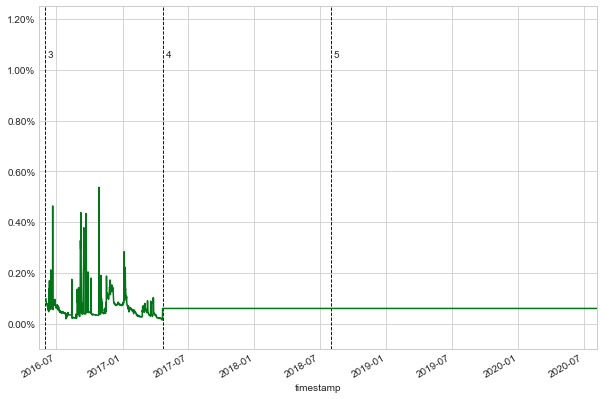

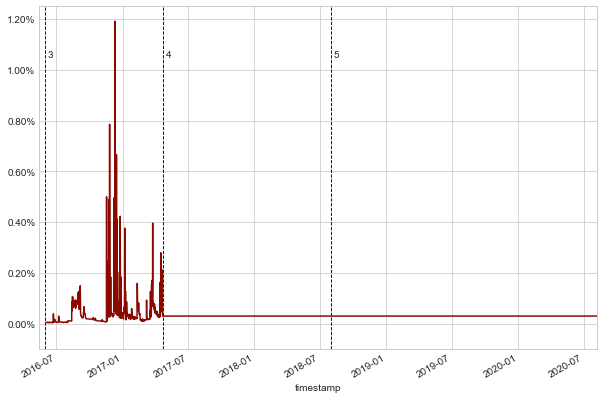

In [183]:
import matplotlib.ticker as mtick
import matplotlib.ticker as ticker
df = pd.DataFrame(df_xbt_bitmex[df_xbt_bitmex["fundingRate"]!=0])
plt.figure(figsize=(15,10.5))
df["XBTUSDPI8H"] = df["XBTUSDPI8H"]*100
ax = df["XBTUSDPI8H"].plot(label="Premium")
plt.vlines("2016-06-01 00:00:00",-5.1,5, linewidth=0.9, linestyles="dashed")
plt.vlines("2017-04-22 00:00:00",-5.1,5, linewidth=0.9,linestyles="dashed")
plt.vlines("2018-08-01 00:00:00",-5.1,5, linewidth=0.9,linestyles="dashed")
plt.annotate(3,("2016-06-08 00:00:00",4))
plt.annotate(4,("2017-04-30 00:00:00",4))
plt.annotate(5,("2018-08-08 00:00:00",4))
plt.ylim(-5,5)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(bbox_to_anchor=(0.90,1))
plt.xticks([])

df["close"] = df["close"]
ax = df["close"].plot(secondary_y=True, alpha=0.3, color="#001C7F", label="XBTUSD Price")
formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)
ax.legend(bbox_to_anchor=(1,0.97))
plt.xticks(["2016-06","2016-12","2017-06","2017-12","2018-06","2018-12",
            "2019-06","2019-12","2020-06"], rotation=90)


plt.figure(figsize=(10,7))
df["USDBON8H"] = df["USDBON8H"]*100
ax = df["USDBON8H"].plot(color="#017517")
plt.vlines("2016-06-01 00:00:00",-0.1,1.25, linewidth=0.9, linestyles="dashed")
plt.vlines("2017-04-22 00:00:00",-0.1,1.25, linewidth=0.9,linestyles="dashed")
plt.vlines("2018-08-01 00:00:00",-0.1,1.25, linewidth=0.9,linestyles="dashed")
plt.annotate(3,("2016-06-08 00:00:00",1.05))
plt.annotate(4,("2017-04-30 00:00:00",1.05))
plt.annotate(5,("2018-08-08 00:00:00",1.05))
plt.ylim(-0.1,1.25)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())


plt.figure(figsize=(10,7))
df["XBTBON8H"] = df["XBTBON8H"]*100
ax = df["XBTBON8H"].plot(color="#8C0900")
plt.vlines("2016-06-01 00:00:00",-0.1,1.25, linewidth=0.9, linestyles="dashed")
plt.vlines("2017-04-22 00:00:00",-0.1,1.25, linewidth=0.9,linestyles="dashed")
plt.vlines("2018-08-01 00:00:00",-0.1,1.25, linewidth=0.9,linestyles="dashed")
plt.annotate(3,("2016-06-08 00:00:00",1.05))
plt.annotate(4,("2017-04-30 00:00:00",1.05))
plt.annotate(5,("2018-08-08 00:00:00",1.05))
plt.ylim(-0.1,1.25)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())